In [2]:
%matplotlib notebook

# standard imports 
from __future__ import division 
from __future__ import print_function 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
from glob import glob 

In [3]:
# imports for playing with fits files 
from sunpy.net import Fido, attrs
from datetime import datetime, timedelta
import astropy.units as u 
import sunpy.map as smap 
from astropy.coordinates import SkyCoord 
from scipy.interpolate import interp1d
from astropy.convolution import convolve, Box1DKernel
from datetime import datetime, timedelta

In [4]:
from AIA_tools import * 

In [5]:
from sunpy.instr.aia import aiaprep

** Download fits files for all desired wavelengths ** 

In [6]:
dtime = datetime(2010, 6, 13, 5, 40, 0)
dt = timedelta(seconds=60*10)

In [7]:
fits_path = "../data/June_2010_CME_burst/fitsFiles"
if not os.path.isdir(fits_path):
    os.mkdir(fits_path) 

** Download fits files ** 

In [8]:
if (os.listdir(fits_path+'/171') == []): 
    fitsFiles.download(dtime, dt, fits_path+'/171', 171)

In [9]:
if (os.listdir(fits_path+'/193') ==[]):
    fitsFiles.download(dtime, dt, fits_path+'/193', 193)

In [10]:
if (os.listdir(fits_path+'/211')==[]):
    fitsFiles.download(dtime, dt, fits_path+'/211', 211) 

In [11]:
if (os.listdir(fits_path+'/304')==[]):
    fitsFiles.download(dtime, dt, fits_path+'/304', 304)

In [12]:
if (os.listdir(fits_path+'/335')==[]):
    fitsFiles.download(dtime, dt, fits_path+'/335', 335)

** open and prepare the fits files ** 

In [13]:
fits_files_171 = glob("../data/June_2010_CME_burst/fitsFiles/171/*.fits")
fits_files_193 = glob("../data/June_2010_CME_burst/fitsFiles/193/*.fits")
fits_files_211 = glob("../data/June_2010_CME_burst/fitsFiles/211/*.fits")
fits_files_304 = glob("../data/June_2010_CME_burst/fitsFiles/304/*.fits")
fits_files_335 = glob("../data/June_2010_CME_burst/fitsFiles/335/*.fits")

** There are too many fits files to open all at once. We'll have to do it one at a time. ** 

** Let's make a movie for all of the filters ** 

In [14]:
num_files = len(fits_files_171) 
assert(len(fits_files_171)==len(fits_files_193))
assert(len(fits_files_193)==len(fits_files_211))
assert(len(fits_files_211)==len(fits_files_304))
assert(len(fits_files_304)==len(fits_files_335))
assert(len(fits_files_335)==len(fits_files_171)) 

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(30, 6))

bl_x = 700 
bl_y = -800
tr_x = 1220
tr_y = -100

for j in range(len(fits_files_171)):
    print(j)
    data = [smap.Map(fits_files_171[j]), smap.Map(fits_files_193[j]), smap.Map(fits_files_211[j]),
        smap.Map(fits_files_304[j]), smap.Map(fits_files_335[j])] 
    data = smap.Map(data, cube=True)
    for i in range(len(data)): 
        sub_data = analysis.makeSubmap(data[i], bl_x, bl_y, tr_x, tr_y)
        plt.sca(ax[i]) 
        sub_data.plot() 
        sub_data.draw_limb() 
    plt.savefig("../data/June_2010_CME_burst/figs/image_{0:04d}".format(j)) 


In [15]:
data = [smap.Map(fits_files_171[50]), smap.Map(fits_files_193[50]), smap.Map(fits_files_211[50]),
        smap.Map(fits_files_304[50]), smap.Map(fits_files_335[50])] 

bl_x = 700 
bl_y = -800
tr_x = 1220
tr_y = -100

x_i =945 * u.arcsec
x_f = 1215 * u.arcsec
y_i = -470 * u.arcsec
y_f = -365 * u.arcsec

sub_data = [] 
radial_slits = [] 
radial_slits_2 = []

smooth_intensities = []

distances = []


dr = 5*u.arcsec 
for i in range(len(data)):  
    sub_data.append(analysis.makeSubmap(data[i], bl_x, bl_y, tr_x, tr_y))
    radial_slits.append(analysis.getRadialSlit(x_i, x_f, y_i, y_f ,500, data[i]))
    slit_intensity, d = analysis.getRadialSlitIntensity(radial_slits[i], data[i]) 
    smoothed = analysis.smoothAndNormalizeSlit(slit_intensity)
    smooth_intensities.append(smoothed) 
    distances.append(d) 


/usr/local/anaconda2/lib/python2.7/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


In [16]:
for thing in sub_data[0].meta: 
    print(thing)

simple
bitpix
naxis
naxis1
naxis2
bld_vers
lvl_num
t_rec
trecstep
trecepoc
trecroun
origin
date
telescop
instrume
date-obs
t_obs
camera
img_type
exptime
expsdev
int_time
wavelnth
waveunit
wave_str
fsn
fid
quallev0
quality
totvals
datavals
missvals
percentd
datamin
datamax
datamedn
datamean
datarms
dataskew
datakurt
datacent
datap01
datap10
datap25
datap75
datap90
datap95
datap98
datap99
nsatpix
oscnmean
oscnrms
flat_rec
nspikes
ctype1
cunit1
crval1
cdelt1
crpix1
ctype2
cunit2
crval2
cdelt2
crpix2
crota2
r_sun
mpo_rec
inst_rot
imscl_mp
x0_mp
y0_mp
asd_rec
sat_y0
sat_z0
sat_rot
acs_mode
acs_eclp
acs_sunp
acs_safe
acs_cgt
orb_rec
dsun_ref
dsun_obs
rsun_ref
rsun_obs
gaex_obs
gaey_obs
gaez_obs
haex_obs
haey_obs
haez_obs
obs_vr
obs_vw
obs_vn
crln_obs
crlt_obs
car_rot
hgln_obs
hglt_obs
roi_nwin
roi_sum
roi_nax1
roi_nay1
roi_llx1
roi_lly1
roi_nax2
roi_nay2
roi_llx2
roi_lly2
pixlunit
dn_gain
eff_area
eff_ar_v
tempccd
tempgt
tempsmir
tempfpad
ispsname
isppktim
isppktvn
aivnmst
aimgots
asqhdr
asq

<IPython.core.display.Javascript object>


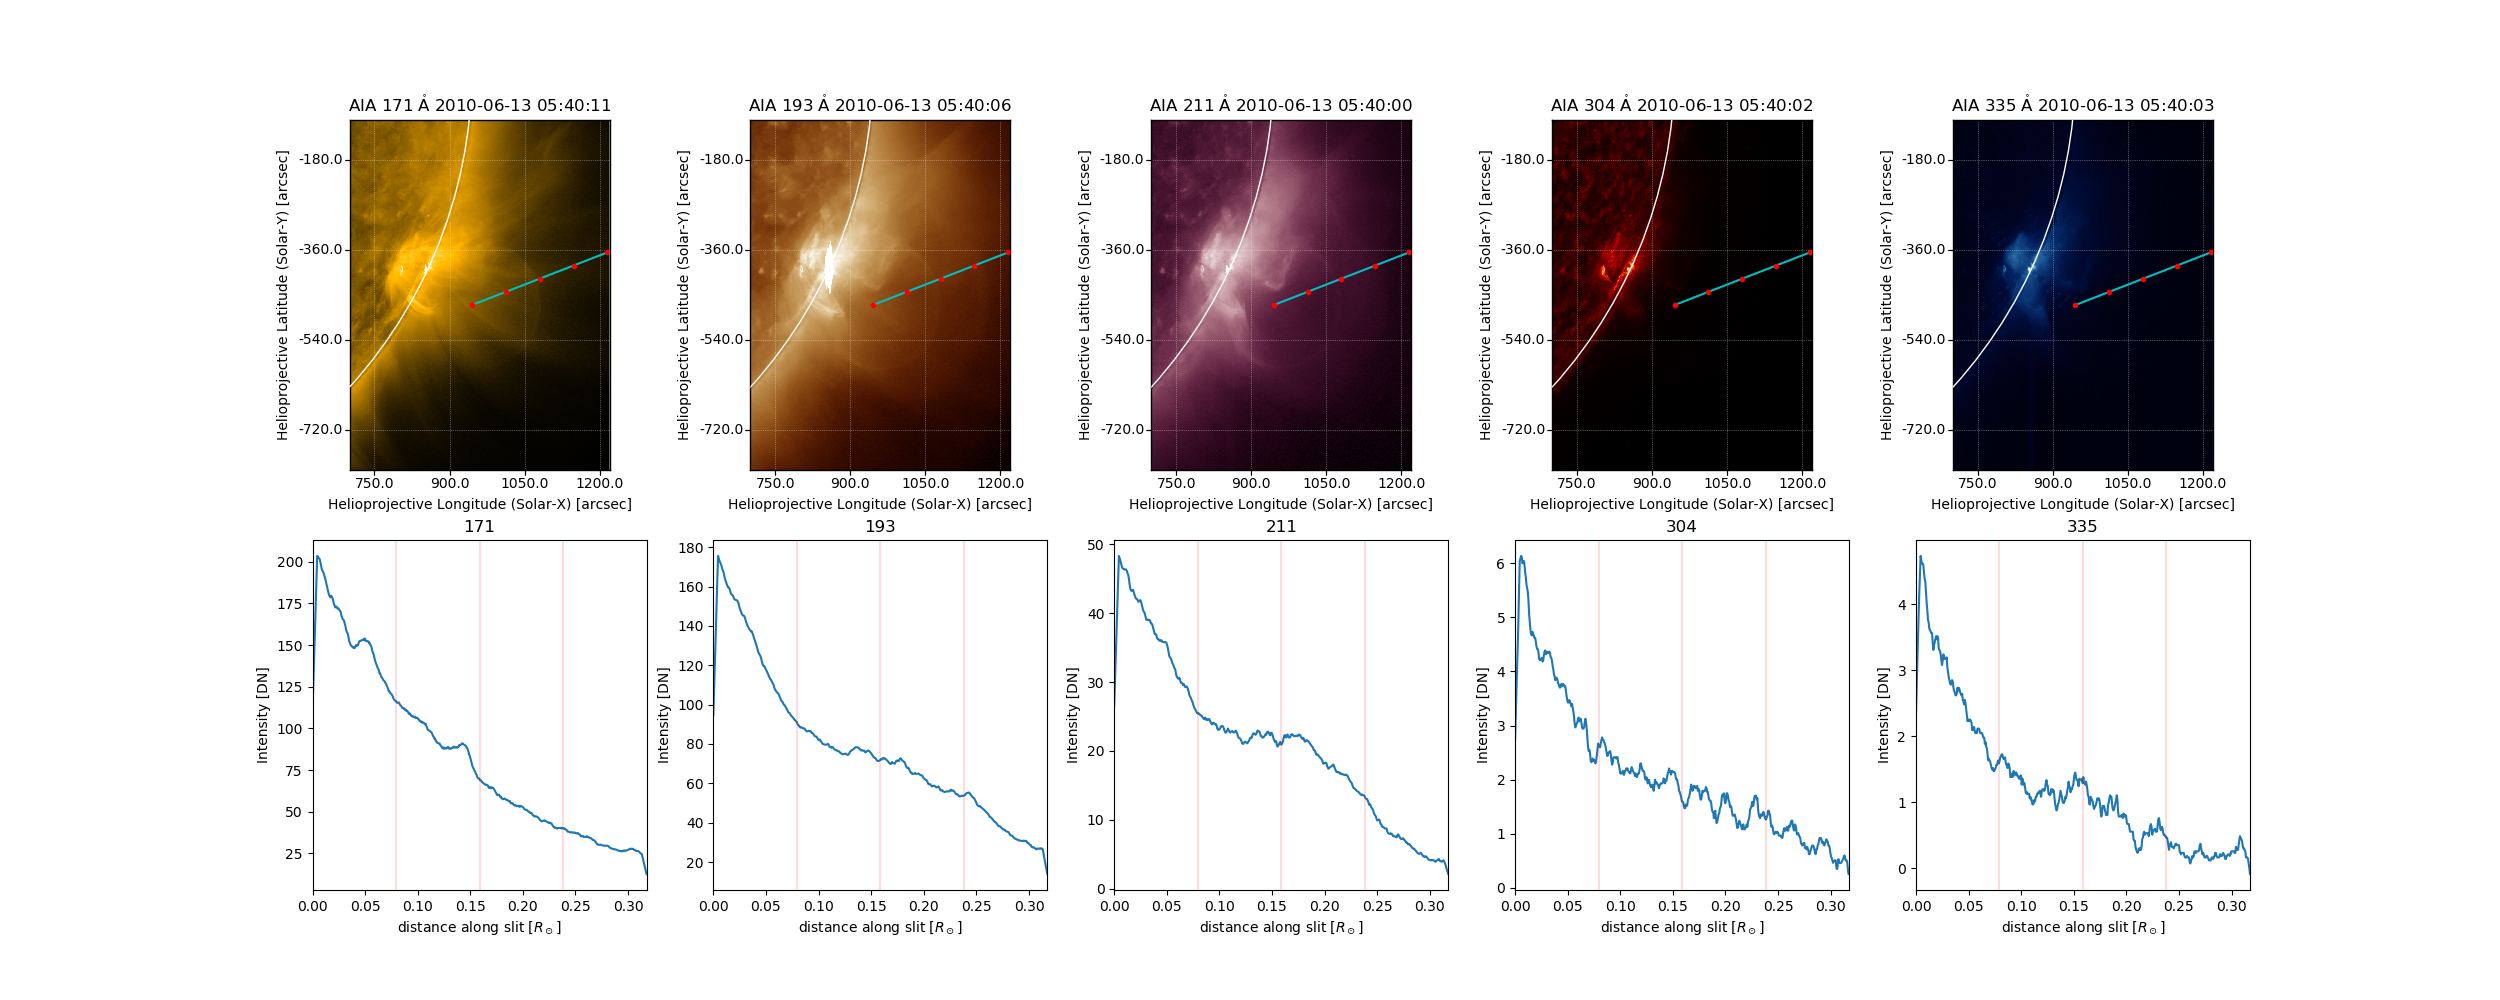

In [17]:
fig = plt.figure(figsize=(25,10))

for i in range(len(sub_data)): 
    ax_i = plt.subplot(2,5,(i+1), projection=sub_data[i])
    plt.sca(ax_i) 
    sub_data[i].plot() 
    sub_data[i].draw_limb() 
    ax_i.plot_coord(radial_slits[i], 'c')
    ax_i.plot_coord(radial_slits[i][0], 'r.')
    ax_i.plot_coord(radial_slits[i][125], 'r.') 
    ax_i.plot_coord(radial_slits[i][250], 'r.') 
    ax_i.plot_coord(radial_slits[i][375], 'r.')
    ax_i.plot_coord(radial_slits[i][499], 'r.')
    
    ax_ip5 = plt.subplot(2,5,i+1+5) 
    ax_ip5.plot(distances[i], smooth_intensities[i]) 
    ax_ip5.set_title(sub_data[i].meta['wavelnth'])
    ax_ip5.set_xlabel("distance along slit [$R_\odot$]")
    ax_ip5.set_ylabel("Intensity [{}]".format(sub_data[i].meta['pixlunit']))
    
    M = np.asarray(distances[i]).max() 
    m = np.asarray(distances[i]).min() 
    ax_ip5.axvline(M/2.0, color='r', linewidth=0.2)
    ax_ip5.axvline(3.0*M/4.0, color='r', linewidth=0.2) 
    ax_ip5.axvline(M/4.0, color='r', linewidth=0.2)
    ax_ip5.set_xlim(m, M)

<IPython.core.display.Javascript object>


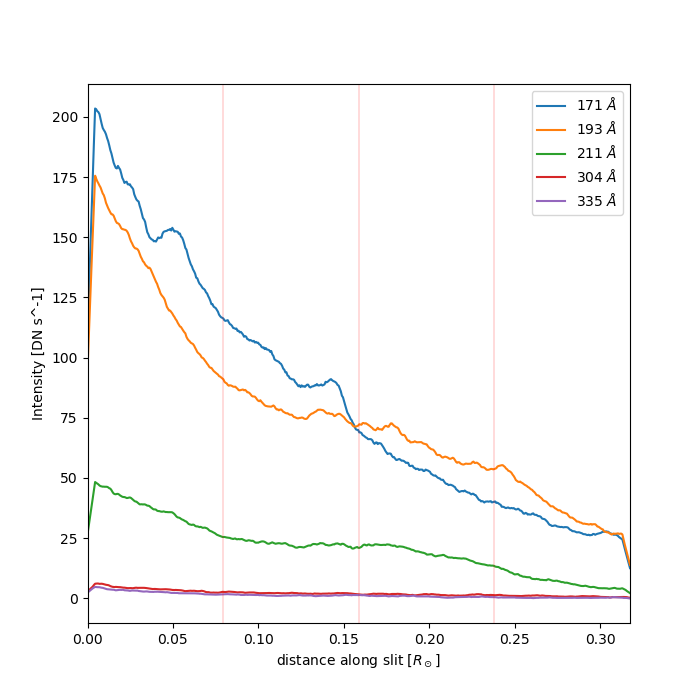

In [17]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot() 

for i in range(len(sub_data)): 
    ax.plot(distances[i], smooth_intensities[i], label="{} $\AA$".format(sub_data[i].meta['wavelnth'])) 
    
M = np.asarray(distances[i]).max() 
m = np.asarray(distances[i]).min() 

ax.axvline(M/2.0, color='r', linewidth=0.2)
ax.axvline(3.0*M/4.0, color='r', linewidth=0.2) 
ax.axvline(M/4.0, color='r', linewidth=0.2)

ax.set_xlim(m, M)
ax.set_ylabel("Intensity [{} s^-1]".format(sub_data[0].meta['pixlunit']))    
ax.set_xlabel("distance along slit [$R_\odot$]")
ax.legend() 


** Let's turn this plot into a movie to see what happens time-scale wise ** 

In [ ]:
times = {'171':[], '193':[], '211':[], '304':[], '335':[]}
distances = {'171':[], '193':[], '211':[], '304':[], '335':[]}
intensities = {'171':[], '193':[], '211':[], '304':[], '335':[]}
submaps = {'171':[], '193':[], '211':[], '304':[], '335':[]}
radial_slits = {'171':[], '193':[], '211':[], '304':[], '335':[]}

# make figure 
fig = plt.figure(figsize=(7,7))
ax = plt.subplot() 

colors = ['k', 'b', 'r', 'm', 'g']

for j in range(len(fits_files_171)):
    print(j)
    
    # clear the graph 
    plt.cla() 
    
    # get data 
    data = [smap.Map(fits_files_171[j]), smap.Map(fits_files_193[j]), smap.Map(fits_files_211[j]),
        smap.Map(fits_files_304[j]), smap.Map(fits_files_335[j])] 
    
    bl_x = 700 
    bl_y = -800
    tr_x = 1220
    tr_y = -100

    x_i =945 * u.arcsec
    x_f = 1215 * u.arcsec
    y_i = -470 * u.arcsec
    y_f = -365 * u.arcsec


    # add jth element to each dictionary 
    count = 0 
    for key in submaps:  
        submaps[key].append(analysis.makeSubmap(data[count], bl_x, bl_y, tr_x, tr_y))
        radial_slits[key].append(analysis.getRadialSlit(x_i, x_f, y_i, y_f ,500, data[count]))
        slit_intensity, d = analysis.getRadialSlitIntensity(radial_slits[key][j], data[count]) 
        intensities[key].append(analysis.smoothAndNormalizeSlit(slit_intensity))
        distances[key].append(d) 
        count += 1 

    # plot each jth element
    count = 0 
    for key in submaps: 
        ax.plot(distances[key][j], intensities[key][j], colors[count], label="{} $\AA$".format(submaps[key][j].meta['wavelnth'])) 
        count += 1 
        
    # format the graph 
    M = np.asarray(distances['171'][j]).max() 
    m = np.asarray(distances['171'][j]).min() 

    ax.axvline(M/2.0, color='r', linewidth=0.2)
    ax.axvline(3.0*M/4.0, color='r', linewidth=0.2) 
    ax.axvline(M/4.0, color='r', linewidth=0.2)

    ax.set_xlim(m, M)
    ax.set_ylim(0, 340)
    ax.set_ylabel("Intensity [{} s^-1]".format(submaps['171'][0].meta['pixlunit']))    
    ax.set_xlabel("distance along slit [$R_\odot$]")
    ax.legend() 
    ax.set_title(submaps['171'][0].meta['date_obs'])
    plt.savefig("../data/June_2010_CME_burst/figs/mult_intensities_{0:04d}".format(j)) 

<IPython.core.display.Javascript object>

0
1


In [1]:
for key in times: 
    times[key] = analysis.getTimes(submaps[key])


NameError: name 'times' is not defined

In [1]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
i = 0 
for key in times: 
    analysis.plotRadialStack(times[key], distances[key], intensities[key], fig, ax[i])
    ax[i].set_xlabel("Times") 
    ax[i].set_ylabel("Distance [$R_\odot$]")
    ax[i].set_title('{}$\AA$'.format(submaps[key][0].meta['wavelnth']))
    i += 1 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=None)

NameError: name 'plt' is not defined